# Unsupervised Machine Learning

# Teen Market Segmentation Using K-means Clustering

Interacting with friends on a social networking service (SNS) has become a rite of passage for teenagers around the world. 

The many millions of teenage consumers using such sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. 

One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold. 

For instance, sporting apparel is likely to be a difficult sell to teens with no interest in sports. <br>

# Dataset Information

The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. 

To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection.

The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. 

The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile. <br>

# Load Libraries

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
data = pd.read_csv("C:/Users/hp/Downloads/Python Projects/Project 8/snsdata.csv")
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


# Summary Statistics

<b> Summary Statistics of Numerical Variables <br>

In [3]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


<b> Summary Statistics of Categorical Variables <br>

In [4]:
data.describe(include='object')

,gender
count,27276
unique,2
top,F
freq,22054


<b> Treating Missing Values <br>

In [5]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

A total of 5,086 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.

Let's have a look at the number of male and female candidates in our dataset. <br>

In [6]:
data['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

Let's have a look at the number of male, female and msiing values. <br>

In [7]:
data['gender'].value_counts(dropna = False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

There are 22054 female, 5222 male teen students and 2724 missing values.

Now we are going to fill all the null values in gender column with “No Gender”. <br>

In [12]:
data['gender'].fillna('not disclosed', inplace = True)

In [14]:
data['gender'].isnull().sum()

0

Also, the age cloumn has 5086 missing values. 

One way to deal with these missing values would be to fill the missing values with the average age of each graduation year. <br>

In [15]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

From the above summary we can observe that the mean age differs by roughly one year per change in graduation year. This is not at all surprising, but a helpful finding for confirming our data is reasonable.

We now fill the missing values for each graduation year with the mean that we got as above. <br>

In [16]:
data['age'] = data.groupby('gradyear').transform(lambda x : x.fillna(x.mean()))

In [17]:
data['age'].isnull().sum()

0

We don't have any missing values in the 'age' column. <br>

In [18]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

From the above summary we can see that there are no missing values in the dataset. <br>

# Treating Outliers

The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. 

A reasonable age range for people attending high school will be the age range between 13 to 21. 

The rest should be treated as outliers keeping the age of student going to high school in mind. Let's detect the outliers using a box plot below. <br>

C:\Anaconda\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

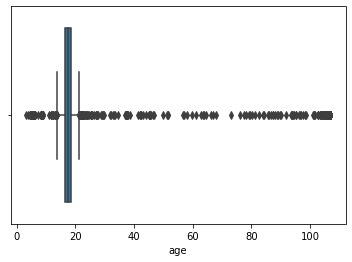

In [19]:
sns.boxplot(data['age'])

In [22]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1
print(iqr)

1.8874592240696728


In [23]:
df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]

In [24]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

From the above summary we can observe that after treating the outliers the mininmum age is 13.719000 and the maximum age is 21.158000 <br>

In [25]:
df.shape

(29633, 40)

C:\Anaconda\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

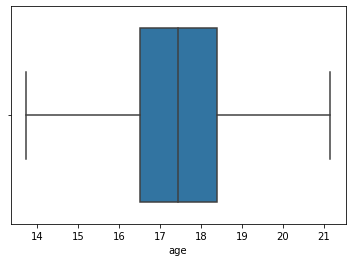

In [26]:
sns.boxplot(df['age'])

From the above boxplot we observe that there are no outliers in the age column <br>

# Data Preprocessing

A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. 

By doing so, we can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.

The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. 

This transformation changes the interpretation of the data in a way that may be useful here. 

Specifically, if someone mentions Swimming three times on their profile, without additional information, we have no idea whether this implies they like Swimming more or less than their peers. 

On the other hand, if the z-score is three, we know that that they mentioned Swimming many more times than the average teenager. <br>

In [27]:
names = df.columns[5:40]
scaled_feature = data.copy()
names

Index(['football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [28]:
features = scaled_feature[names]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [30]:
features = scaler.transform(features.values)

In [31]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


# Convert Object Variable to Numeric

In [32]:
def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [33]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

<b> Checking the transformed values <br>

In [34]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,0,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,0,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


# Model Building

<b> Building the K-means Model <br>

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

In [36]:
model = kmeans.fit(scaled_feature)

C:\Anaconda\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


<b> Elbow Method <br>

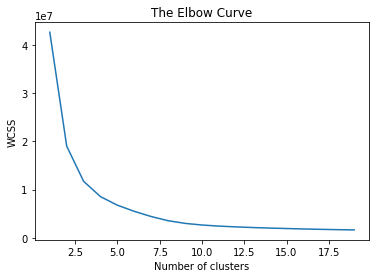

In [37]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. 

Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result. <br>

<b> Fit K-Means clustering for k=5 <br>

In [38]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

As a result of clustering, we have the clustering label. Let's put these labels back into the original numeric data frame. <br>

In [39]:
len(kmeans.labels_)

30000

In [41]:
data['cluster'] = kmeans.labels_
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


<b> Interpreting Clustering Results <br>

Let's see cluster sizes first <br>

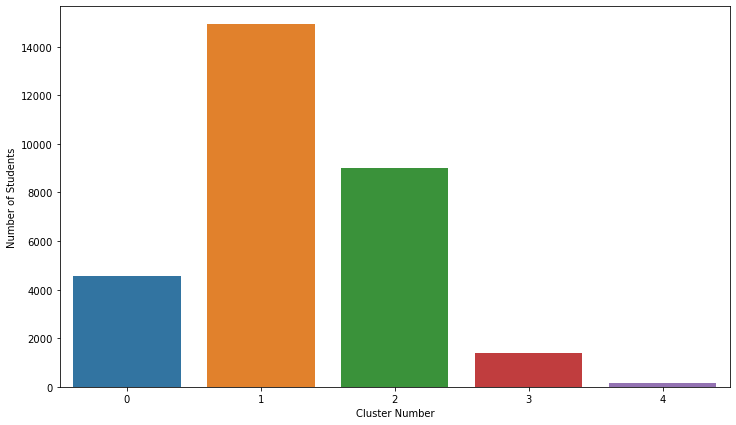

In [42]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Students")

From the above plot we can see that cluster 0 is the largest and cluster 1 has fewest teen students

Let' see the number of students belonging to each cluster <br>

In [43]:
size_array = list(data.groupby(['cluster']).count()['age'].values)
size_array

[4541, 14915, 8992, 1378, 174]

let's check the cluster statistics <br>

In [45]:
data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.333187,0.284519,0.269324,0.244440,0.183660,0.159216,0.136093,0.127505,0.095133,0.153270,0.392865,0.183440,0.161418,0.147985,0.116935,0.494164,0.310725,0.044043,0.780885,0.276371,0.548558,0.323057,0.146884,0.023563,0.448139,0.128826,0.102400,0.314688,0.437128,0.168465,0.094693,0.076855,0.173750,0.122220,0.087426,0.059238
1,0.223332,0.228763,0.192021,0.121086,0.109420,0.115924,0.086021,0.090714,0.080724,0.127523,0.273684,0.206235,0.126785,0.108548,0.095608,0.363862,0.270667,0.034931,0.681529,0.221254,0.409051,0.200872,0.092792,0.018706,0.395039,0.096346,0.080322,0.219578,0.297620,0.134898,0.054844,0.039826,0.178880,0.101509,0.084076,0.064097
2,0.289257,0.267682,0.245440,0.170151,0.169484,0.149244,0.110098,0.112211,0.093972,0.153581,0.342193,0.225423,0.146908,0.133230,0.106762,0.466415,0.342638,0.047820,0.803381,0.262122,0.486432,0.266459,0.119440,0.023465,0.436833,0.118216,0.121886,0.265125,0.377891,0.157028,0.071842,0.049044,0.194395,0.127335,0.089969,0.057051
3,0.376633,0.301161,0.248186,0.255443,0.192308,0.145864,0.201742,0.133527,0.089985,0.143687,0.480406,0.224238,0.185776,0.208273,0.109579,0.587083,0.289550,0.041364,0.785196,0.257620,0.642961,0.394775,0.161103,0.030479,0.514514,0.156023,0.134978,0.419448,0.484761,0.168360,0.130624,0.091437,0.204644,0.134253,0.113208,0.047896
4,0.321839,0.247126,0.270115,0.218391,0.224138,0.212644,0.172414,0.132184,0.086207,0.126437,0.465517,0.212644,0.201149,0.126437,0.160920,0.465517,0.344828,0.057471,0.678161,0.189655,0.614943,0.241379,0.086207,0.005747,0.649425,0.166667,0.132184,0.316092,0.574713,0.195402,0.126437,0.143678,0.206897,0.160920,0.132184,0.051724


The cluster center values shows each of the cluster centroids of the coordinates. 

The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. 

Positive values are above the overall mean level. <br>